The dataset is called MNIST and refers to handwritten digit recognition. You can find more about it on Yann LeCun's website (Director of AI Research, Facebook). He is one of the pioneers of what we've been talking about and of more complex approaches that are widely used today, such as covolutional neural networks (CNNs). 

The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image). 

The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes. 

Our goal would be to build a neural network with 2 hidden layers.

# import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
# Download dataset from given link and run on Google colab
# https://drive.google.com/drive/folders/1INmh3bK4keuZNnfTHsSi39mnQ6VOUInE?usp=sharing

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

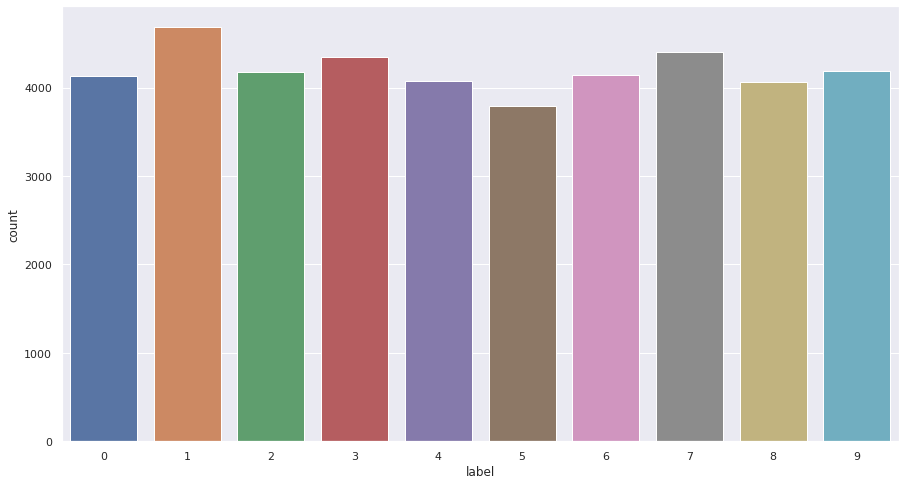

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='label', data=train)

In [8]:
Y_train.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

## Dealing with Null Values

In [9]:
X_train.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [10]:
test.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [11]:
train=train.dropna()
X_train = train.iloc[:,1:].values
Y_train = train.iloc[:,0].values
X_train.shape,Y_train.shape

((42000, 784), (42000,))

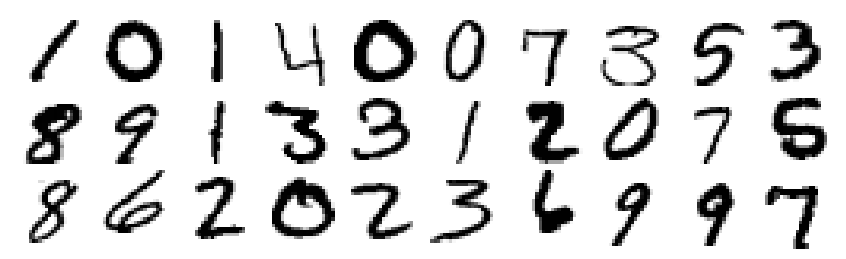

In [12]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [13]:
test=test.dropna()
test=test.values
test.shape

(28000, 784)

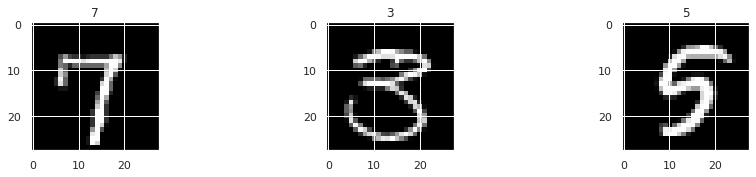

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(Y_train[i]);

# Normalize and Reshape

In [15]:
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

# Encoding 

(ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

In [16]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [17]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# spliting Data in training and testing set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

# Visualize the digit

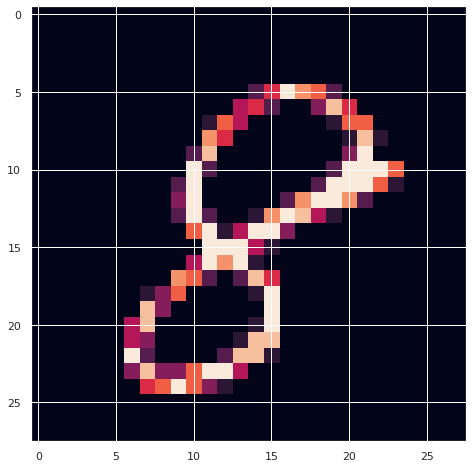

In [19]:
g = plt.imshow(X_train[0][:,:,0])

# **Building the CNN**

## Initializing CNN

In [20]:
cnn=tf.keras.models.Sequential()

2022-07-15 07:53:30.461058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 07:53:30.588975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 07:53:30.590269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 07:53:30.592471: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Step 1  Convolution

In [21]:

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding = 'Same',activation='relu',input_shape = (28,28,1)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding = 'Same',activation='relu'))

## Step 2  Pooling

In [22]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.25))

## Step 3 Adding 2nd Layer

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

## Step 4 Adding 3rd Layer

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

## Step 5 Again Pooling

In [25]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.25))

## Step 6 Flatting

In [26]:
cnn.add(tf.keras.layers.Flatten())

## Step 7 Full Connection

In [27]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

## Step 8 Output Layer

In [28]:
cnn.add(tf.keras.layers.Dense(10, activation = "softmax"))

## Set the Optimizer

In [29]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

## Compiling the CNN

In [30]:
cnn.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Set a learning rate annealer

In [31]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

## Set the number of epochs

In [32]:
epochs = 100
batch_size = 64

## Data Augmentation

set input mean to 0 over the dataset

set each sample mean to 0

divide inputs by std of the dataset

divide each input by its std

apply ZCA whitening

randomly rotate images in the range (degrees, 0 to 180)

Randomly zoom image

randomly shift images horizontally (fraction of total width)

randomly shift images vertically (fraction of total height)

randomly flip images

randomly flip images

In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 


datagen.fit(X_train)

# Training the CNN on the Training set and evaluating it on the Test set

In [34]:
model = cnn.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

2022-07-15 07:53:35.690326: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-15 07:53:37.804275: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


590/590 - 23s - loss: 0.3873 - accuracy: 0.8767 - val_loss: 0.0676 - val_accuracy: 0.9802
Epoch 2/100
590/590 - 15s - loss: 0.1197 - accuracy: 0.9636 - val_loss: 0.0496 - val_accuracy: 0.9883
Epoch 3/100
590/590 - 15s - loss: 0.0925 - accuracy: 0.9719 - val_loss: 0.0358 - val_accuracy: 0.9900
Epoch 4/100
590/590 - 15s - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.0340 - val_accuracy: 0.9902
Epoch 5/100
590/590 - 14s - loss: 0.0745 - accuracy: 0.9781 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 6/100
590/590 - 15s - loss: 0.0695 - accuracy: 0.9794 - val_loss: 0.0220 - val_accuracy: 0.9933
Epoch 7/100
590/590 - 14s - loss: 0.0717 - accuracy: 0.9803 - val_loss: 0.0290 - val_accuracy: 0.9914
Epoch 8/100
590/590 - 15s - loss: 0.0715 - accuracy: 0.9790 - val_loss: 0.0386 - val_accuracy: 0.9902
Epoch 9/100
590/590 - 15s - loss: 0.0723 - accuracy: 0.9803 - val_loss: 0.0271 - val_accuracy: 0.9926
Epoch 10/100
590/590 - 14s - loss: 0.0726 - accuracy: 0.9805 - val_loss: 0.0275 - val_accuracy

## Confusion Matrics

In [35]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

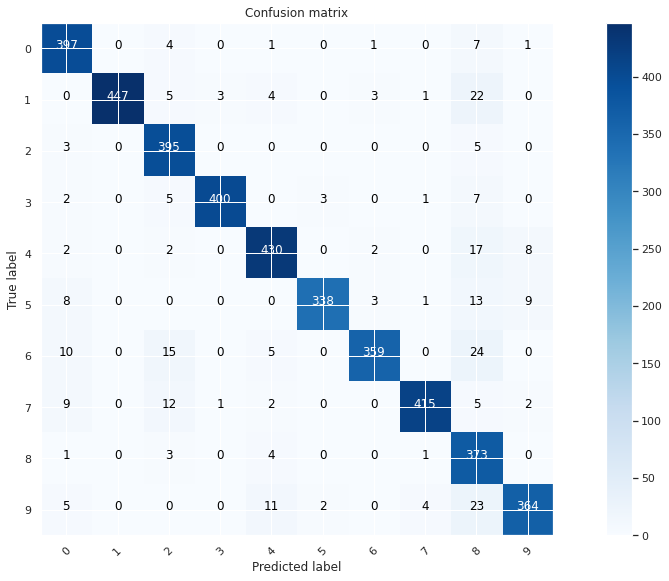

In [36]:
from sklearn.metrics import confusion_matrix
import itertools
# Predict the values from the validation dataset
Y_pred = cnn.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# Submission

In [37]:
test_pred = pd.DataFrame( cnn.predict([test]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [38]:
test_pred.to_csv('submission1.csv', index = False)